[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
Tracking Error (SPY): 3733.123514392384
Tracking Error (IVV): 3731.498294570342
Tracking Error (VOO): 3766.602778218653
[*********************100%%**********************]  4 of 4 completed
Optimal Portfolio Allocation:
VOO: 6.26%
GOVT: 11.44%
SPBO: 5.9%
VNQ: 76.41%
Expected Annual Return: 2.25%
Annual Volatility: 18.47%
Sharpe Ratio: -0.09


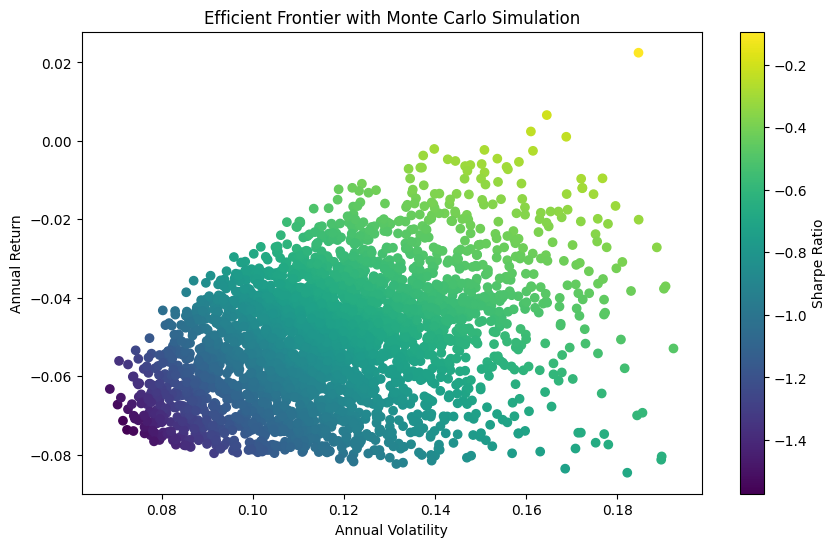

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define asset tickers
stock_assets = ['^GSPC', 'SPY', 'IVV', 'VOO']
bond_assets = ['^TNX', 'SPBO', 'SCHI', 'GIGB']
real_estate_assets = ['^GSPC', 'VNQ', 'SCHH', 'XLRE']

# Download stock market data
data_stock = yf.download(tickers=stock_assets, period='1y', interval='1d')
data_stock = data_stock['Adj Close']

# Download bond data
data_bonds = yf.download(tickers=bond_assets, period='1y', interval='1d')
data_bonds = data_bonds['Adj Close']

# Download real estate data
data_real_estate = yf.download(tickers=real_estate_assets, period='1y', interval='1d')
data_real_estate = data_real_estate['Adj Close']

# Calculate Tracking Error (TE) for each ETF
data_stock['TE_SPY'] = (data_stock['^GSPC'] - data_stock['SPY']) ** 2
data_stock['TE_IVV'] = (data_stock['^GSPC'] - data_stock['IVV']) ** 2
data_stock['TE_VOO'] = (data_stock['^GSPC'] - data_stock['VOO']) ** 2

# Calculate TE for bonds and real estate ETFs (similar approach)
# ...

# Calculate cumulative TE
TE_SPY = np.sqrt(data_stock['TE_SPY'].cumsum()[-1] / (len(data_stock) - 1))
TE_IVV = np.sqrt(data_stock['TE_IVV'].cumsum()[-1] / (len(data_stock) - 1))
TE_VOO = np.sqrt(data_stock['TE_VOO'].cumsum()[-1] / (len(data_stock) - 1))

# Display TE results
print("Tracking Error (SPY):", TE_SPY)
print("Tracking Error (IVV):", TE_IVV)
print("Tracking Error (VOO):", TE_VOO)

# Select the ETF with the lowest TE as the US stock market ETF
us_stock_market_etf = 'VOO'

# Define asset tickers for portfolio optimization
portfolio_assets = [us_stock_market_etf, 'GOVT', 'SPBO', 'VNQ']

# Download data for portfolio assets (2-year period for portfolio allocation)
data_portfolio = yf.download(tickers=portfolio_assets, period='2y', interval='1d')
data_portfolio = data_portfolio['Adj Close']

# Generate random portfolios for Monte Carlo simulation
num_portfolios = 3000
portfolio_returns = []
portfolio_volatility = []

# Calculate mean returns and covariances for portfolio optimization
mean_returns = data_portfolio.pct_change().mean()
cov_matrix = data_portfolio.pct_change().cov()

# Monte Carlo simulation for portfolio optimization
for _ in range(num_portfolios):
    weights = np.random.random(len(portfolio_assets))
    weights /= np.sum(weights)

    portfolio_returns.append(np.sum(weights * mean_returns) * 252)
    portfolio_volatility.append(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252))

# Convert results to NumPy arrays
portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)

# Calculate the Sharpe ratio for each portfolio
risk_free_rate = 0.04
sharpe_ratio = (portfolio_returns - risk_free_rate) / portfolio_volatility

# Find the portfolio with the highest Sharpe ratio
optimal_portfolio_idx = sharpe_ratio.argmax()
optimal_portfolio_return = portfolio_returns[optimal_portfolio_idx]
optimal_portfolio_volatility = portfolio_volatility[optimal_portfolio_idx]
optimal_portfolio_weights = (weights * 100).round(2)

# Display the results for the optimal portfolio
print("Optimal Portfolio Allocation:")
for asset, weight in zip(portfolio_assets, optimal_portfolio_weights):
    print(f"{asset}: {weight}%")
print(f"Expected Annual Return: {optimal_portfolio_return * 100:.2f}%")
print(f"Annual Volatility: {optimal_portfolio_volatility * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio[optimal_portfolio_idx]:.2f}")

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatility, portfolio_returns, c=sharpe_ratio, cmap='viridis')
plt.title('Efficient Frontier with Monte Carlo Simulation')
plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()


Optimal Portfolio Weights:
      Portfolio Return  Portfolio Volatility
1733          0.470217              0.320219


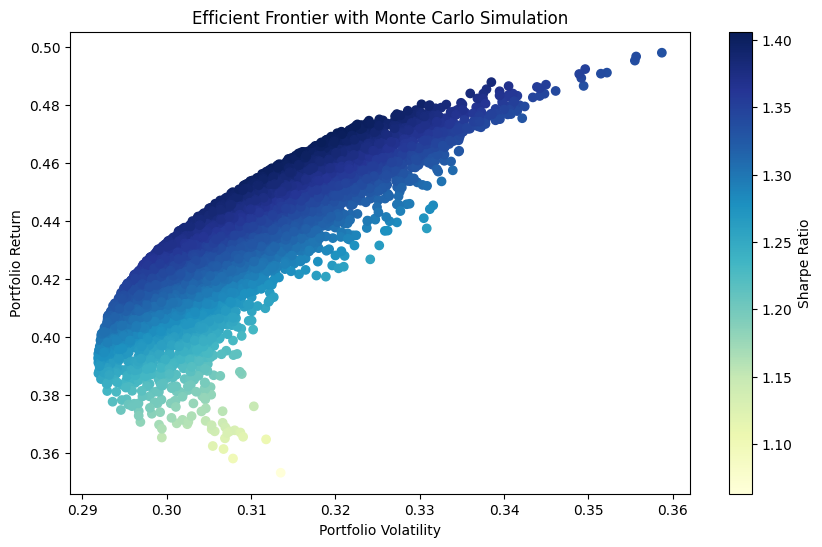

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.optimize as sco
import matplotlib.pyplot as plt

# Define a list of assets (e.g., stock tickers) for the portfolio
assets = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

# Download historical price data for the selected assets
data = yf.download(assets, start="2020-01-01", end="2021-12-31", progress=False)

# Calculate the daily returns for each asset
returns = data['Adj Close'].pct_change()

# Define the number of Monte Carlo simulations
num_simulations = 10000

# Create lists to store simulation results
portfolio_returns = []
portfolio_volatilities = []

for i in range(num_simulations):
    # Generate random weights for the assets in the portfolio
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)

    # Calculate the portfolio returns and volatility
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    # Append the results to the lists
    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)

# Create a DataFrame from the lists of results
simulated_portfolios = pd.DataFrame({'Portfolio Return': portfolio_returns, 'Portfolio Volatility': portfolio_volatilities})

# Calculate the Sharpe ratio for each portfolio
risk_free_rate = 0.02
simulated_portfolios['Sharpe Ratio'] = (simulated_portfolios['Portfolio Return'] - risk_free_rate) / simulated_portfolios['Portfolio Volatility']

# Find the portfolio with the highest Sharpe ratio
optimal_portfolio = simulated_portfolios[simulated_portfolios['Sharpe Ratio'] == simulated_portfolios['Sharpe Ratio'].max()]

# Display the optimal portfolio weights
print("Optimal Portfolio Weights:")
print(optimal_portfolio[['Portfolio Return', 'Portfolio Volatility']])

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(simulated_portfolios['Portfolio Volatility'], simulated_portfolios['Portfolio Return'], c=simulated_portfolios['Sharpe Ratio'], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier with Monte Carlo Simulation')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()


ETF Statistics:
      Annualized Returns(%)  Annualized Volatility(%)  Sharpe Ratio  \
^SPX               0.111992                  0.174958      0.640107   
SPY                0.129518                  0.172888      0.749147   
IVV                0.130159                  0.174681      0.745126   
VOO                0.130160                  0.174471      0.746030   

      Tracking error  Expense ratio  
^SPX        0.000000           0.00  
SPY         0.000754           0.90  
IVV         0.000697           0.03  
VOO         0.000613           0.03  
Real Estate ETF Statistics:
      Annualized Returns(%)  Annualized Volatility(%)  Sharpe Ratio  \
REZ               -0.382571                  0.219622     -1.741953   
ICF               -0.433681                  0.237909     -1.822887   
VNQ               -0.454371                  0.240089     -1.892508   
JPRE              -0.413902                  0.235356     -1.758624   
IYR               -0.426579                  0.238022  

<ipython-input-3-2a73e3e638b3>:95: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i + 1)


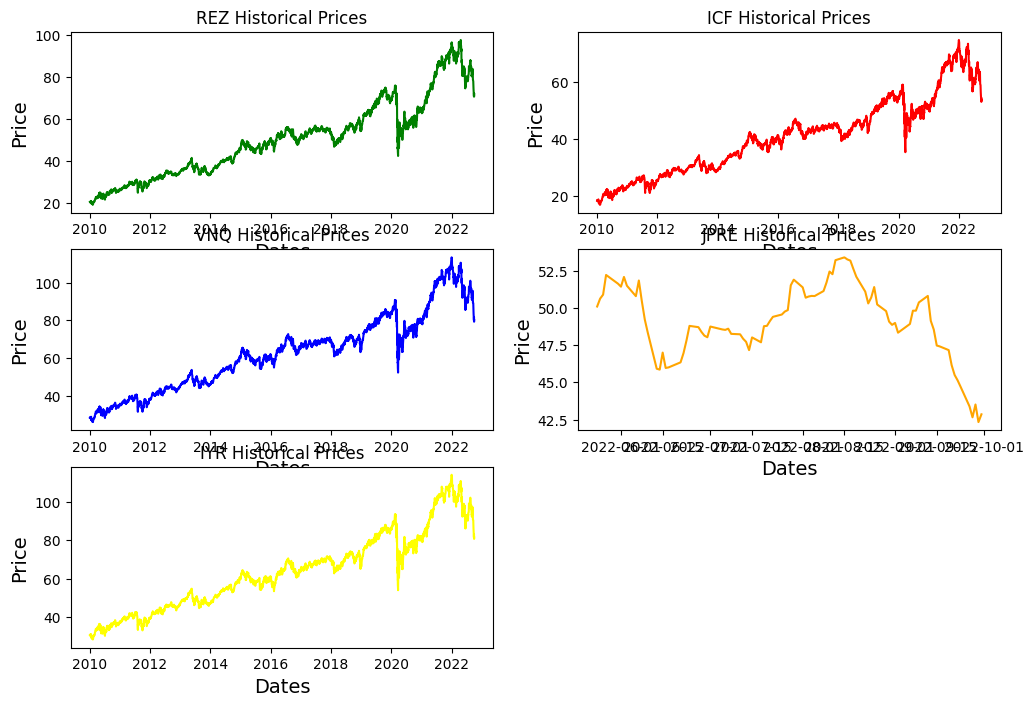

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

# Define functions for downloading ETF data
def download_etf(symbol, source, start_date, end_date):
    data = web.DataReader(symbol, source, start=start_date, end=end_date)
    data = data.sort_index()
    return data

def download_etfs(symbols, source, start_date, end_date):
    dfs = []
    for sym in symbols:
        df = download_etf(sym, source, start_date=start_date, end_date=end_date)
        tmpdf = df['Close']
        dfs.append(tmpdf)
    df = pd.concat(dfs, axis=1)
    df.columns = symbols
    return df

# Calculate tracking error
def tracking_error(index, etf):
    n = len(index)
    tracking_error = np.sqrt(sum((index - etf) ** 2) / (n - 1))
    return tracking_error

if __name__ == "__main__":
    # Define ETF symbols and parameters
    symbols = ["^SPX", "SPY", "IVV", "VOO"]
    source = 'stooq'
    start_date = '2010-01-01'
    end_date = '2022-10-01'

    # Download ETF data
    data = download_etfs(symbols, source, start_date=start_date, end_date=end_date)
    rtndf = data.pct_change().dropna()

    # Calculate tracking errors
    spxspy_te = tracking_error(rtndf['^SPX'], rtndf['SPY'])
    spxivv_te = tracking_error(rtndf['^SPX'], rtndf['IVV'])
    spxvoo_te = tracking_error(rtndf['^SPX'], rtndf['VOO'])

    # Create a DataFrame for ETF statistics
    stats = pd.DataFrame()
    stats['Annualized Returns(%)'] = rtndf.mean() * 252
    stats['Annualized Volatility(%)'] = rtndf.std() * np.sqrt(252)
    stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] / stats['Annualized Volatility(%)']
    stats['Tracking error'] = [0, spxspy_te, spxivv_te, spxvoo_te]
    stats['Expense ratio'] = [0, 0.9, 0.03, 0.03]

    # Print ETF statistics
    print("ETF Statistics:")
    print(stats)

    # Real estate data
    # Define real estate ETF symbols
    re_symbols = ["REZ", "ICF", "VNQ", "JPRE", "IYR"]
    re_start_date = '2010-01-01'
    re_end_date = '2022-10-01'

    # Download real estate ETF data
    re_data = download_etfs(re_symbols, source, start_date=re_start_date, end_date=re_end_date)
    re_rtndf = re_data.pct_change().dropna()

    # Calculate tracking errors for real estate ETFs
    re_tracking_errors = []
    for sym in re_symbols:
        try:
            re_te = tracking_error(rtndf['^SPX'], re_rtndf[sym])
            re_tracking_errors.append(re_te)
        except KeyError:
            # Handle the case where the symbol is not found in the DataFrame
            re_tracking_errors.append(np.nan)

    # Create a DataFrame for real estate ETF statistics
    re_stats = pd.DataFrame()
    re_stats['Annualized Returns(%)'] = re_rtndf.mean() * 252
    re_stats['Annualized Volatility(%)'] = re_rtndf.std() * np.sqrt(252)
    re_stats['Sharpe Ratio'] = re_stats['Annualized Returns(%)'] / re_stats['Annualized Volatility(%)']
    re_stats['Expense ratio'] = [0.06, 0.04, 0.03, 0.04, 0.15]
    re_stats['Tracking error'] = re_tracking_errors

    # Print real estate ETF statistics
    print("Real Estate ETF Statistics:")
    print(re_stats)

    # Plot real estate data and returns (customize this part as needed)
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))

    # Plot normalized real estate ETF data
    for i, symbol in enumerate(re_symbols):
        try:
            plt.subplot(3, 2, i + 1)
            ax = plt.gca()
            ax.plot(re_data[symbol], color=['green', 'red', 'blue', 'orange', 'yellow'][i])
            ax.set_xlabel('Dates', fontsize=14)
            ax.set_ylabel('Price', fontsize=14)
            ax.set_title(f'{symbol} Historical Prices')
        except KeyError:
            # Handle the case where the symbol is not found in the DataFrame
            pass

    plt.show()


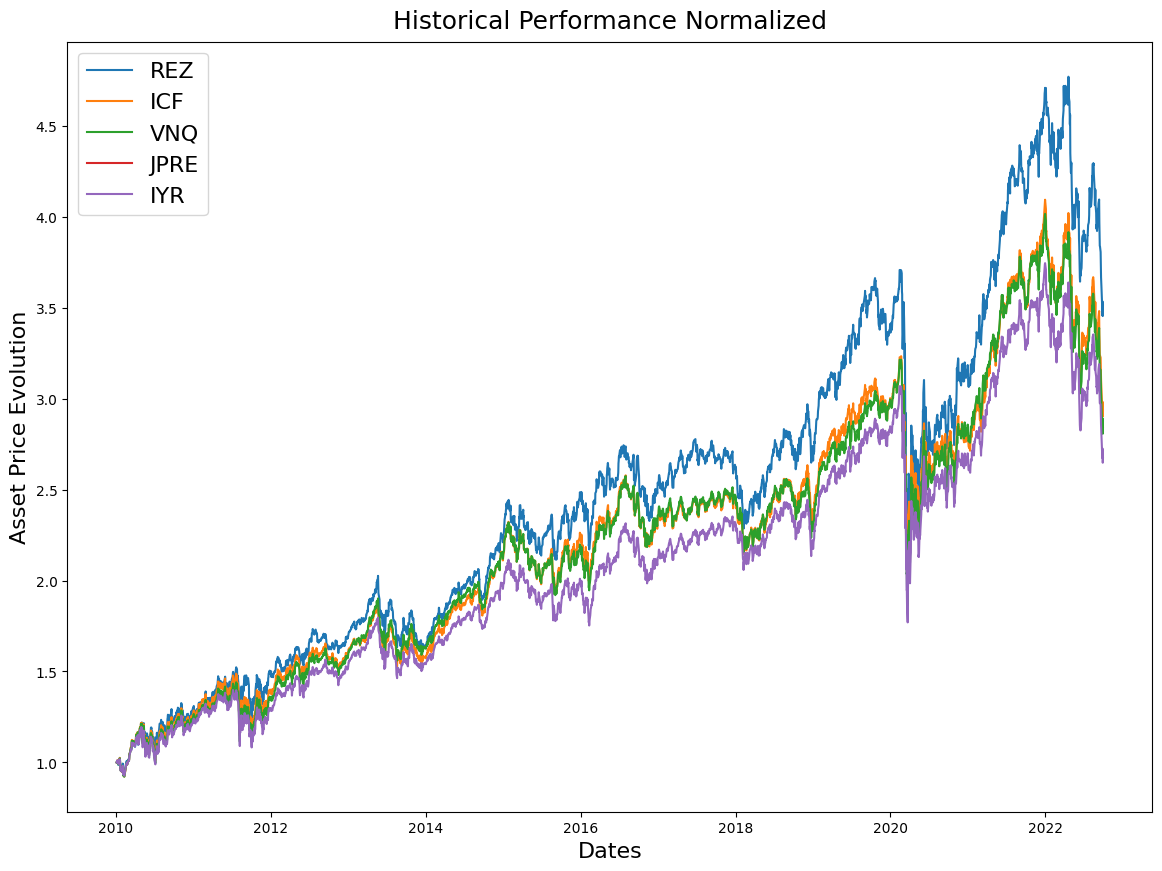

----------------------------------------------------------------------------------
Assets Classes Annualized Statistics - full observation period
      Annualized Returns(%)  Annualized Volatility(%)  Sharpe Ratio
REZ               -0.406867                  0.220565     -1.844657
ICF               -0.462179                  0.238615     -1.936918
VNQ               -0.483484                  0.241180     -2.004659
JPRE              -0.441804                  0.236305     -1.869630
IYR               -0.455132                  0.238990     -1.904396
Bond ETF Statistics:
      Annualized Returns(%)  Annualized Volatility(%)  Sharpe Ratio  \
SPTL               0.043289                  0.166634      0.259783   
VGLT               0.044031                  0.162879      0.270331   
SCHQ               0.043416                  0.165267      0.262702   
TLT                0.048848                  0.176763      0.276345   

      Expense ratio  Tracking error  
SPTL           0.06            

In [4]:
    # Normalize data
    normalized_series = (re_data / re_data.iloc[0])

    fig2 = plt.figure(figsize=(14, 10))
    plt.plot(normalized_series)

    title_text_obj = plt.title("Historical Performance Normalized", fontsize=18, verticalalignment='bottom')
    xlabel_obj = plt.xlabel('Dates', fontsize=16)
    ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize=16)
    legend_labels = [sym for sym in re_symbols if sym in normalized_series.columns]
    plt.legend(legend_labels, fontsize=16)
    plt.show()

    # Calculate returns and statistics
    re_data_returns = np.log(re_data / re_data.shift(1))
    re_data_returns.dropna(inplace=True)

    re_stats = pd.DataFrame()
    re_stats['Annualized Returns(%)'] = re_data_returns.mean() * 252
    re_stats['Annualized Volatility(%)'] = re_data_returns.std() * np.sqrt(252)
    re_stats['Sharpe Ratio'] = re_stats['Annualized Returns(%)'] / re_stats['Annualized Volatility(%)']

    print(82 * '-')
    print('Assets Classes Annualized Statistics - full observation period')
    print(re_stats)

    # Bond data
    # Bond ETF symbols and parameters
    tbond_symbols = ["SPTL", "VGLT", "SCHQ", "TLT"]
    tbond_start_date = '2011-01-01'
    tbond_end_date = '2021-12-31'

    # Download bond ETF data
    tbond_data = download_etfs(tbond_symbols, source, start_date=tbond_start_date, end_date=tbond_end_date)
    tbond_rtndf = tbond_data.pct_change().dropna()

    # Calculate tracking errors for bond ETFs
    tbond_tracking_errors = []
    for sym in tbond_symbols:
        tbond_te = tracking_error(rtndf['^SPX'], tbond_rtndf[sym])
        tbond_tracking_errors.append(tbond_te)

    # Create a DataFrame for bond ETF statistics
    tbond_stats = pd.DataFrame()
    tbond_stats['Annualized Returns(%)'] = tbond_rtndf.mean() * 252
    tbond_stats['Annualized Volatility(%)'] = tbond_rtndf.std() * np.sqrt(252)
    tbond_stats['Sharpe Ratio'] = tbond_stats['Annualized Returns(%)'] / tbond_stats['Annualized Volatility(%)']
    tbond_stats['Expense ratio'] = [0.06, 0.04, 0.03, 0.15]
    tbond_stats['Tracking error'] = tbond_tracking_errors

    # Print bond ETF statistics
    print("Bond ETF Statistics:")
    print(tbond_stats)

    # Commercial bond data
    # Commercial bond ETF symbols and parameters
    cbond_symbols = ["VCSH", "VCIT", "LQD", "HYG", "VCLT"]
    cbond_start_date = '2011-01-01'
    cbond_end_date = '2021-12-31'

    # Download commercial bond ETF data
    cbond_data = download_etfs(cbond_symbols, source, start_date=cbond_start_date, end_date=cbond_end_date)
    cbond_rtndf = cbond_data.pct_change().dropna()

    # Calculate tracking errors for commercial bond ETFs
    cbond_tracking_errors = []
    for sym in cbond_symbols:
        cbond_te = tracking_error(rtndf['^SPX'], cbond_rtndf[sym])
        cbond_tracking_errors.append(cbond_te)

    # Create a DataFrame for commercial bond ETF statistics
    cbond_stats = pd.DataFrame()
    cbond_stats['Annualized Returns(%)'] = cbond_rtndf.mean() * 252
    cbond_stats['Annualized Volatility(%)'] = cbond_rtndf.std() * np.sqrt(252)
    cbond_stats['Sharpe Ratio'] = cbond_stats['Annualized Returns(%)'] / cbond_stats['Annualized Volatility(%)']
    cbond_stats['Expense ratio'] = [0.04, 0.04, 0.14, 0.48, 0.04]
    cbond_stats['Tracking error'] = cbond_tracking_errors

    # Print commercial bond ETF statistics
    print("Commercial Bond ETF Statistics:")
    print(cbond_stats)


In [5]:
import random

# Function to assess risk tolerance
def assess_risk_tolerance():
    risk_questions = [
        "How many years until you need this money?",
        "What is your risk tolerance? (Low, Medium, High)",
    ]

    answers = {}

    for question in risk_questions:
        answer = input(question + " ")
        answers[question] = answer

    return answers

# Function to allocate assets based on risk tolerance
def allocate_assets(risk_answers):
    risk_tolerance = risk_answers.get("What is your risk tolerance? (Low, Medium, High)").lower()

    if risk_tolerance == "low":
        portfolio = {"stocks": 20, "bonds": 80, "cash": 0}
    elif risk_tolerance == "medium":
        portfolio = {"stocks": 50, "bonds": 40, "cash": 10}
    elif risk_tolerance == "high":
        portfolio = {"stocks": 80, "bonds": 20, "cash": 0}
    else:
        print("Invalid risk tolerance. Using a medium-risk portfolio.")
        portfolio = {"stocks": 50, "bonds": 40, "cash": 10}

    return portfolio

# Function to simulate portfolio performance
def simulate_portfolio(portfolio, years):
    annual_return_mean = {"stocks": 0.08, "bonds": 0.04, "cash": 0.02}
    annual_return_stddev = {"stocks": 0.15, "bonds": 0.05, "cash": 0.01}

    for year in range(1, years + 1):
        for asset in portfolio:
            mean_return = annual_return_mean[asset]
            stddev_return = annual_return_stddev[asset]
            portfolio[asset] *= random.normalvariate(1 + mean_return, stddev_return)

# Main program
print("Welcome to the Simplified Robo-Advisor!")

risk_answers = assess_risk_tolerance()
portfolio = allocate_assets(risk_answers)

print("\nAsset Allocation:")
for asset, percentage in portfolio.items():
    print(f"{asset}: {percentage}%")

years_to_invest = int(risk_answers.get("How many years until you need this money?", 10))
simulate_portfolio(portfolio, years_to_invest)

print("\nPortfolio Performance after", years_to_invest, "years:")
for asset, percentage in portfolio.items():
    print(f"{asset}: {percentage:.2f}%")



Welcome to the Simplified Robo-Advisor!
How many years until you need this money? 10
What is your risk tolerance? (Low, Medium, High) low

Asset Allocation:
stocks: 20%
bonds: 80%
cash: 0%

Portfolio Performance after 10 years:
stocks: 59.46%
bonds: 134.32%
cash: 0.00%
